In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [2]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')
data.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [3]:
data.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

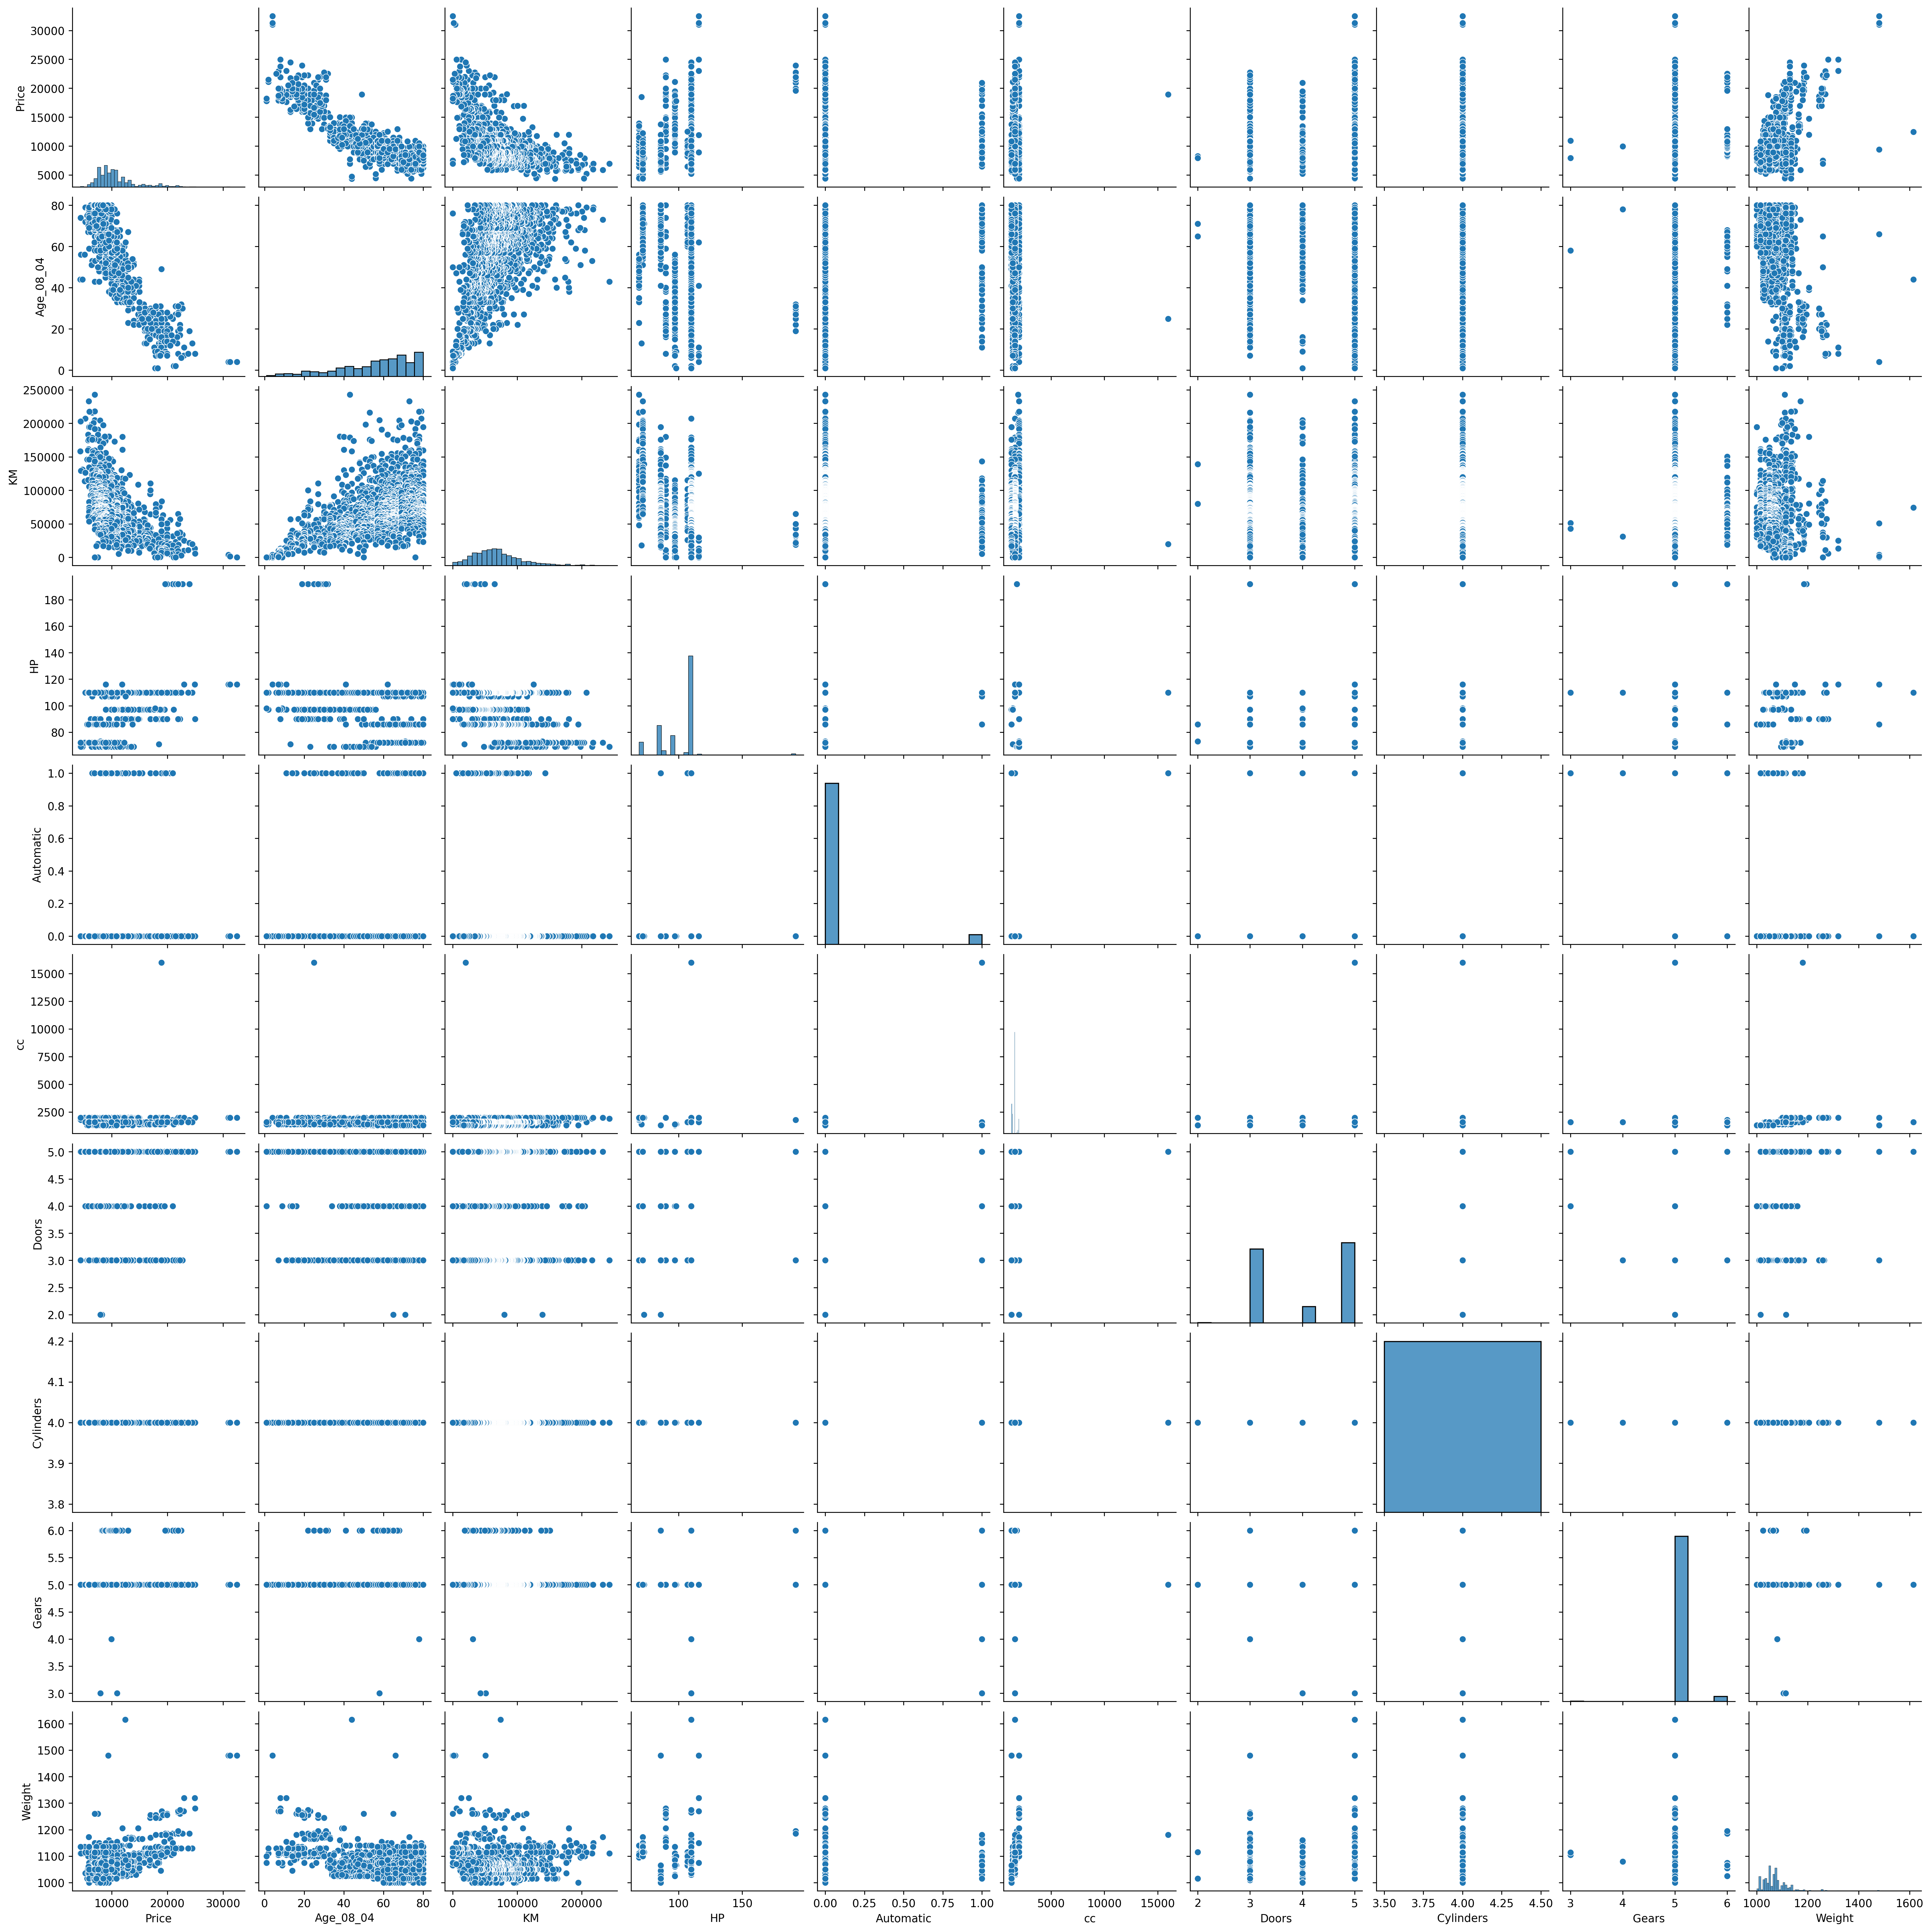

In [4]:
sns.pairplot(data)

<Axes: >

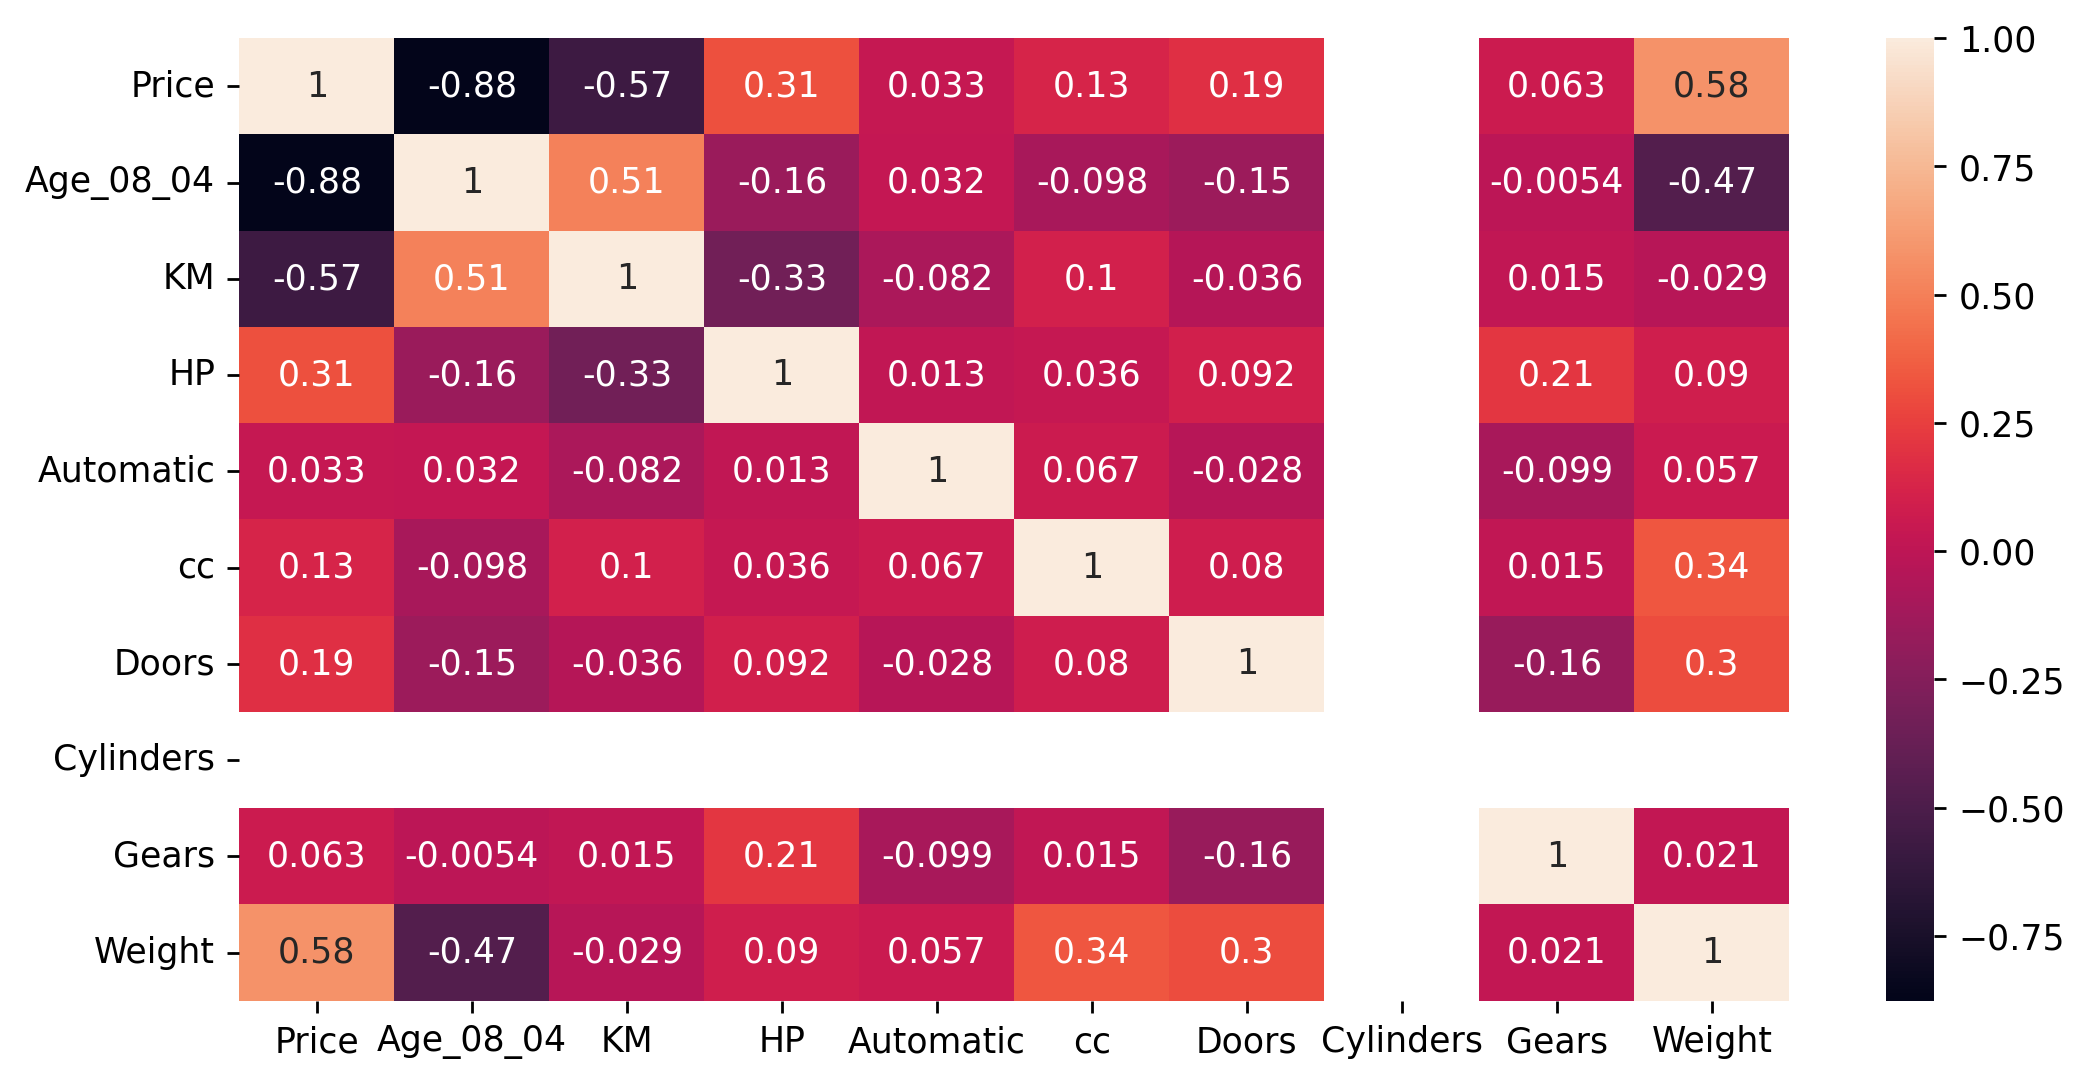

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [9]:
data.duplicated().sum()

1

In [10]:
data[data.duplicated()]

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
113  24950          8  13253    Diesel  116          0  2000      5   

     Cylinders  Gears  Weight  
113          4      5    1320

In [11]:
data[data.duplicated(keep = False)]

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
112  24950          8  13253    Diesel  116          0  2000      5   
113  24950          8  13253    Diesel  116          0  2000      5   

     Cylinders  Gears  Weight  
112          4      5    1320  
113          4      5    1320

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.shape

(1435, 11)

<Axes: >

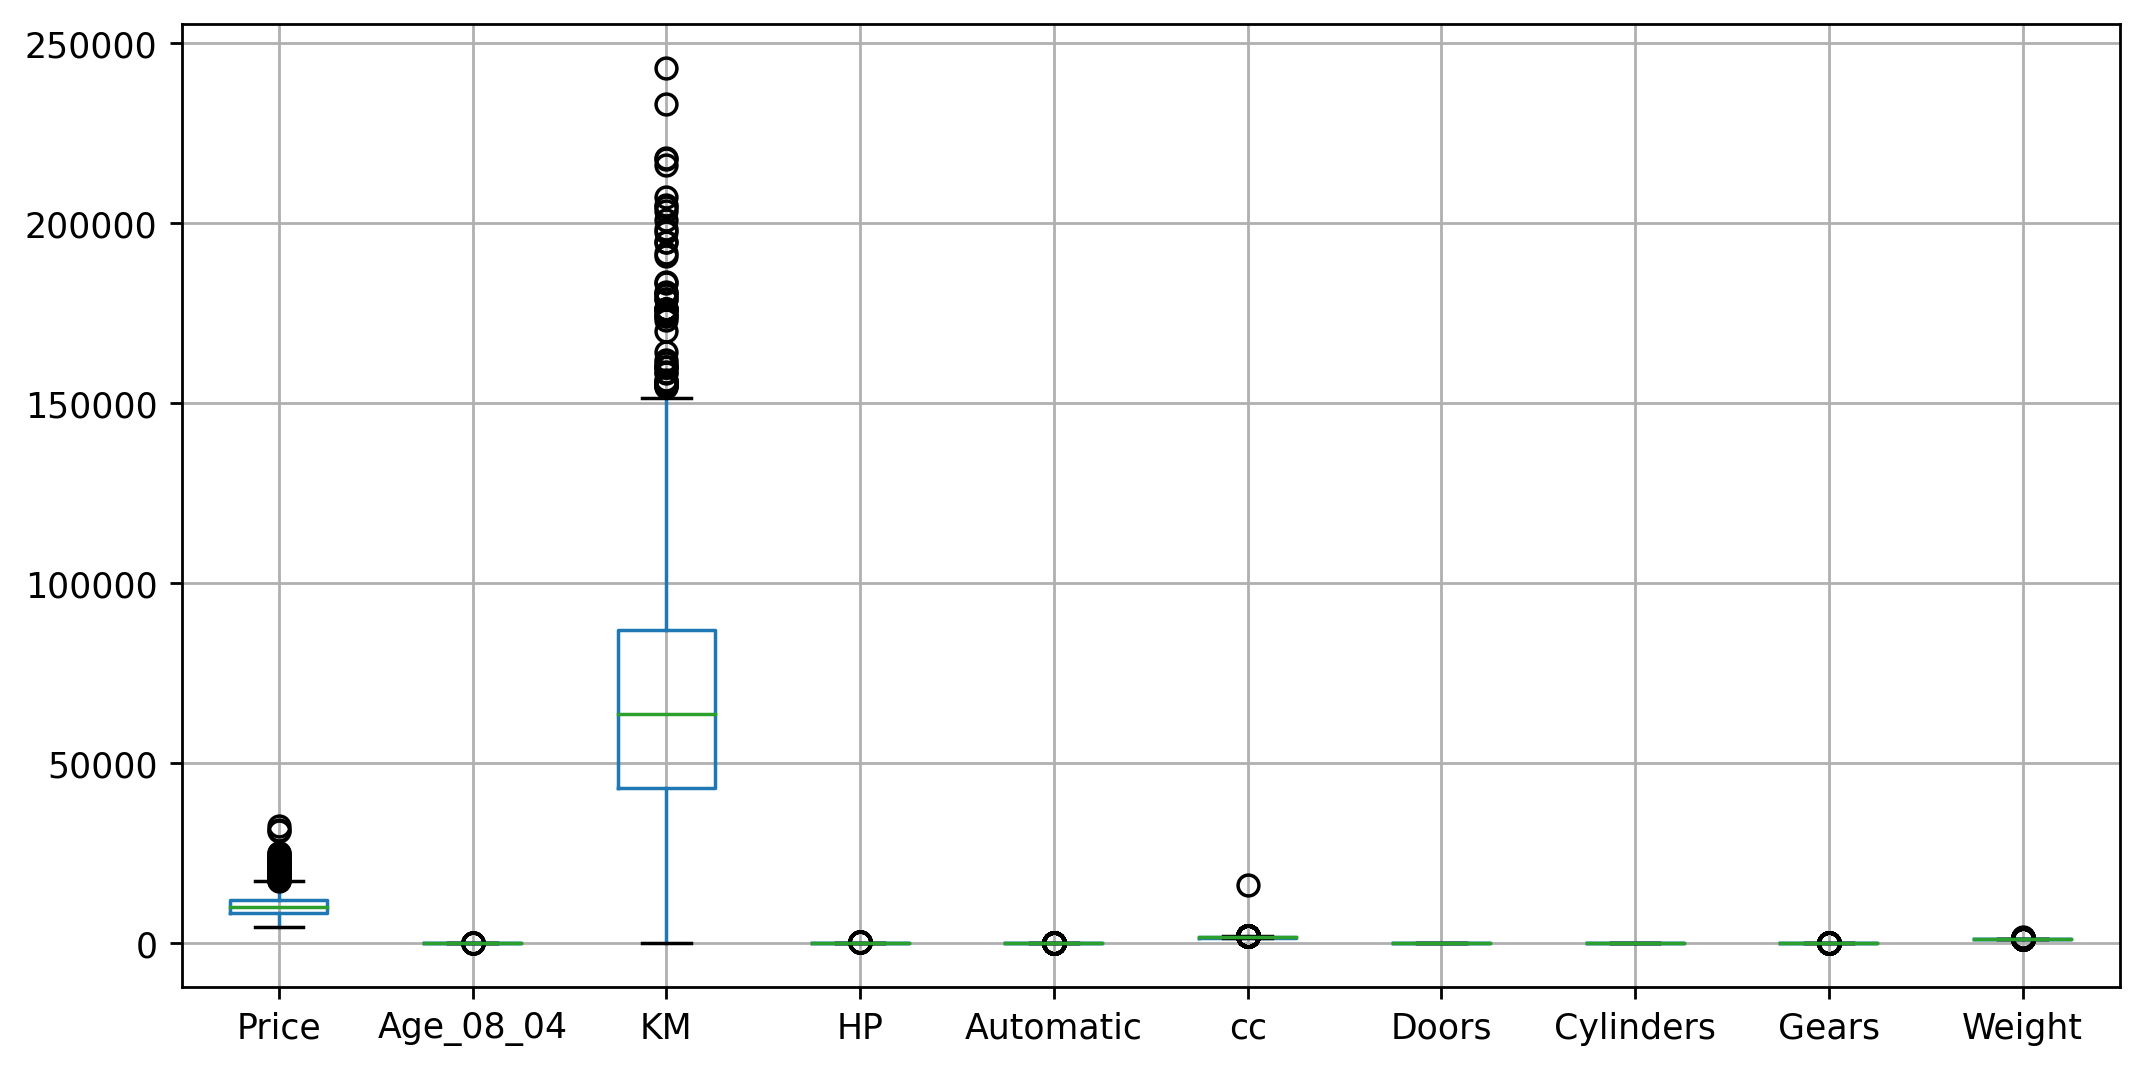

In [14]:
data.boxplot()

In [15]:
data.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000  1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986     0.055749   
std     3608.732978    18.563312   37491.094553    14.981408     0.229517   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63451.000000   110.000000     0.000000   
75%    11950.000000    70.000000   87041.500000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                 cc        Doors  Cylinders        Gears       Weight  
count   1435.000000  1435.000000     1435.0  1435.000000  1435.000000  
mean    1576.560976     4.032753        4.0     5.026481  1072.287108  
std      424.387533     0.952667        0.0     0.188575    52.251882  
min     1300.000000     2.000000        4.0     3.000000  1000.000000  
25%     1400.000000     3.000000        4.0     5.000000  1040.000000  
50%     1600.000000     4.000000        4.0     5.000000  1070.000000  
75%     1600.000000     5.000000        4.0     5.000000  1085.000000  
max    16000.000000     5.000000        4.0     6.000000  1615.000000

In [16]:
# as we can see that using describe and boxplot that in columns(Price, Age_08_04, KM, HP, cc, Weight) there are the outliers 
# present, we are going to treate them accordingly 
# defining user defined function to calculate upper extreme and lower extreme 
def outlier_detection(data,colname) :
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1 
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [17]:
# defining a user defined function to treate outliers
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme, colname]  = upper_extreme
    data.loc[data[colname]<lower_extreme, colname]  = lower_extreme

<Axes: xlabel='Price'>

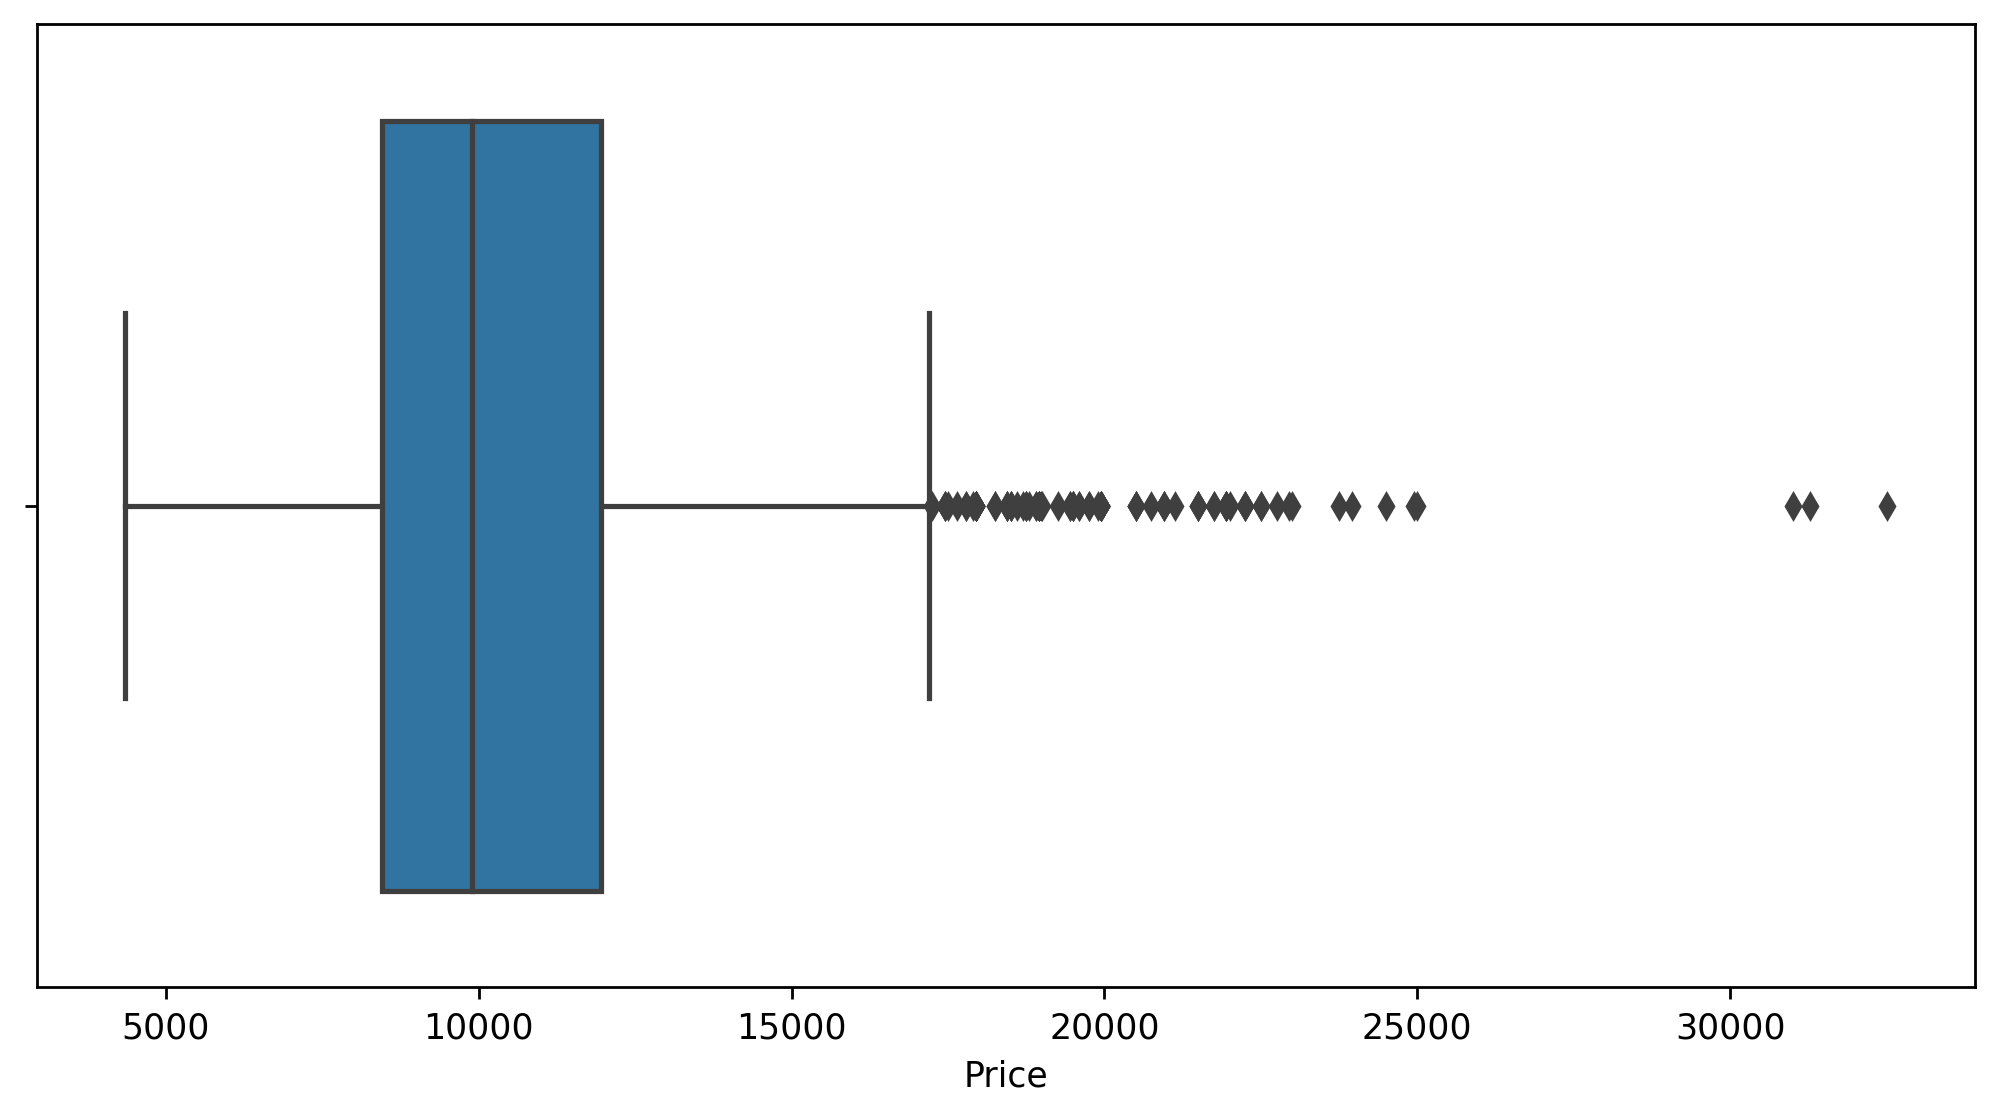

In [18]:
sns.boxplot(x = data['Price'])

In [19]:
outlier_treatment(data,'Price')

<Axes: xlabel='Price'>

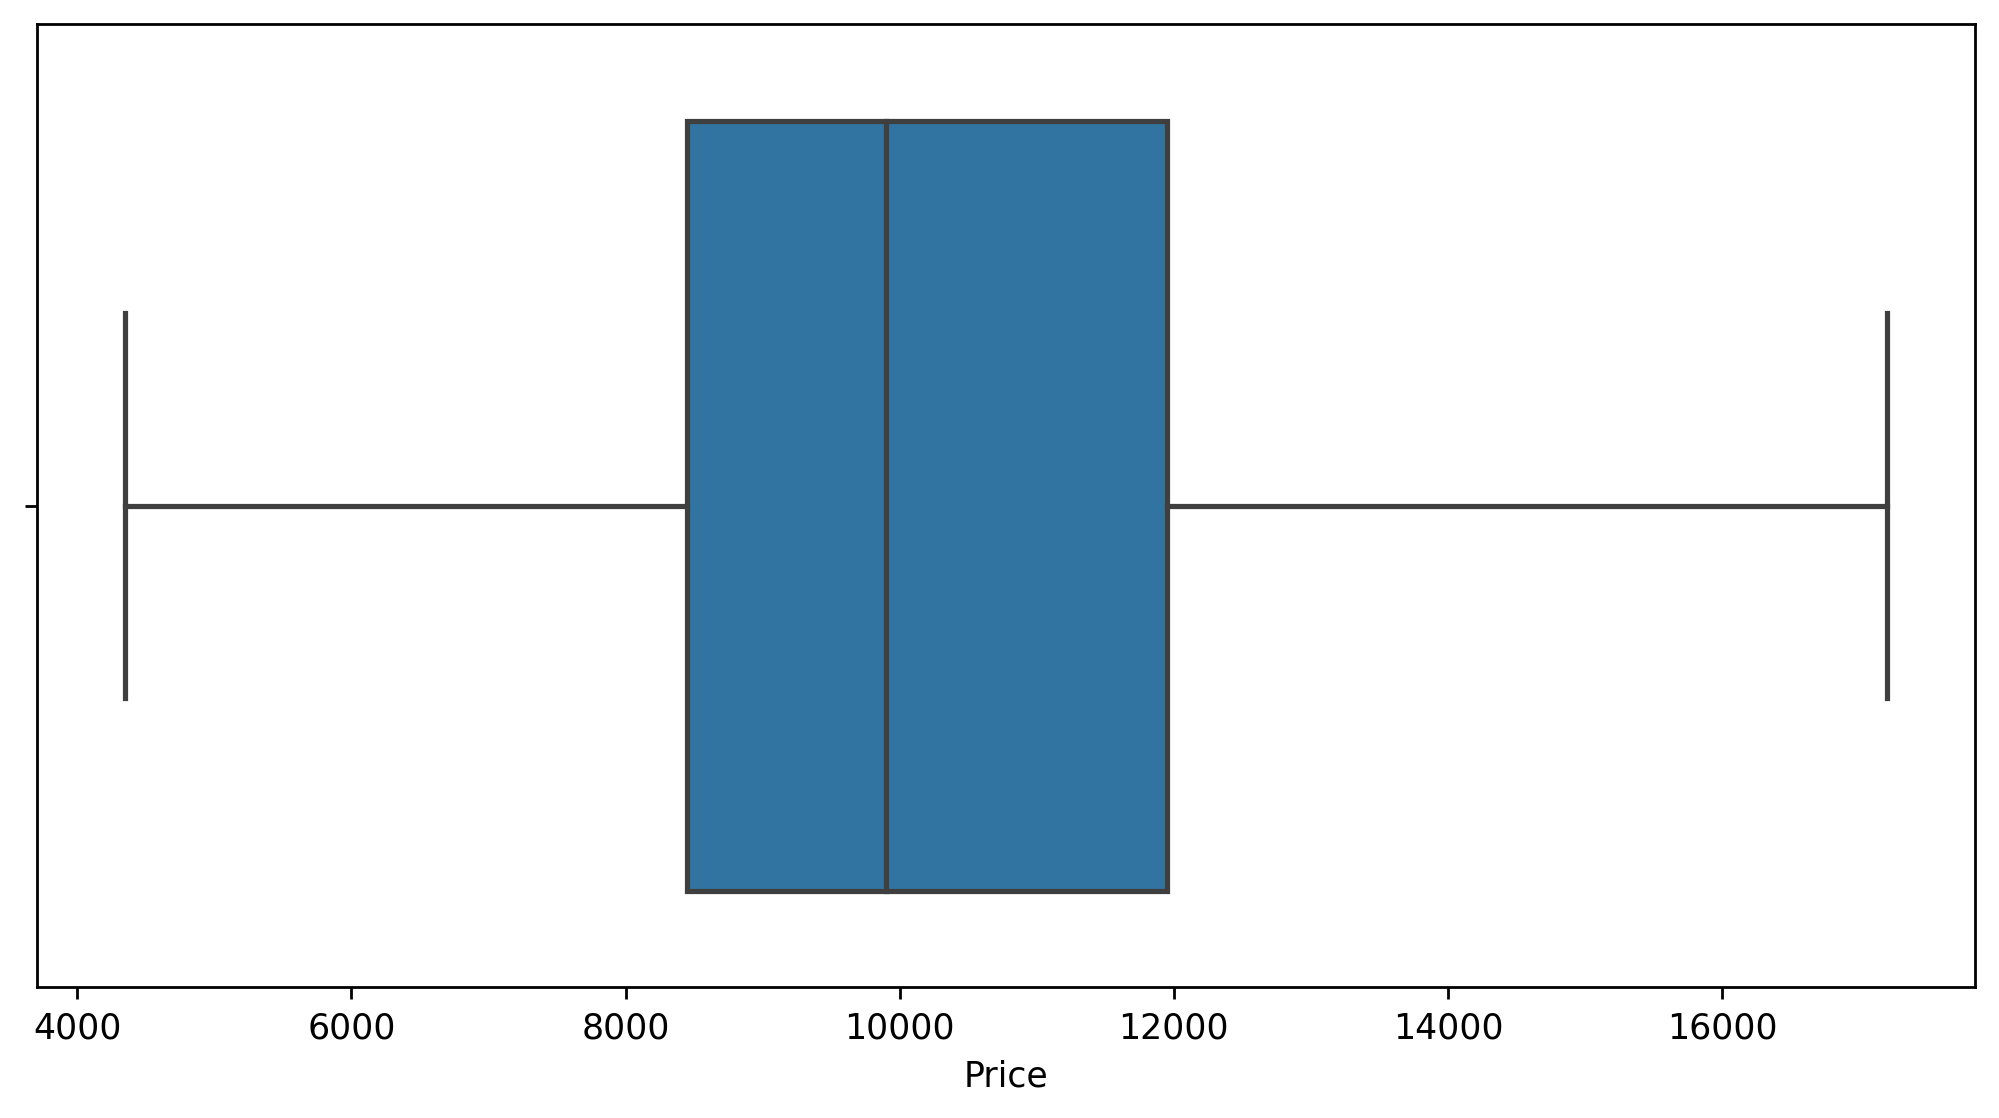

In [20]:
sns.boxplot(x = data['Price'])

In [21]:
#like this we will treat other columns having outliers (Age_08_04, KM, HP, cc, Weight)
outlier_treatment(data,'Age_08_04')
outlier_treatment(data,'KM')
outlier_treatment(data,'HP')
outlier_treatment(data,'cc')
outlier_treatment(data,'Weight')

In [22]:
data.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000  1435.000000   
mean   10495.964460    55.992334   67644.520383   101.093380     0.055749   
std     2977.598549    18.529725   34725.393258    13.146145     0.229517   
min     4350.000000     5.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63451.000000   110.000000     0.000000   
75%    11950.000000    70.000000   87041.500000   110.000000     0.000000   
max    17200.000000    80.000000  153103.750000   140.000000     1.000000   

                cc        Doors  Cylinders        Gears       Weight  
count  1435.000000  1435.000000     1435.0  1435.000000  1435.000000  
mean   1558.327526     4.032753        4.0     5.026481  1068.520906  
std     168.788311     0.952667        0.0     0.188575    37.722708  
min    1300.000000     2.000000        4.0     3.000000  1000.000000  
25%    1400.000000     3.000000        4.0     5.000000  1040.000000  
50%    1600.000000     4.000000        4.0     5.000000  1070.000000  
75%    1600.000000     5.000000        4.0     5.000000  1085.000000  
max    1900.000000     5.000000        4.0     6.000000  1152.500000

<Axes: >

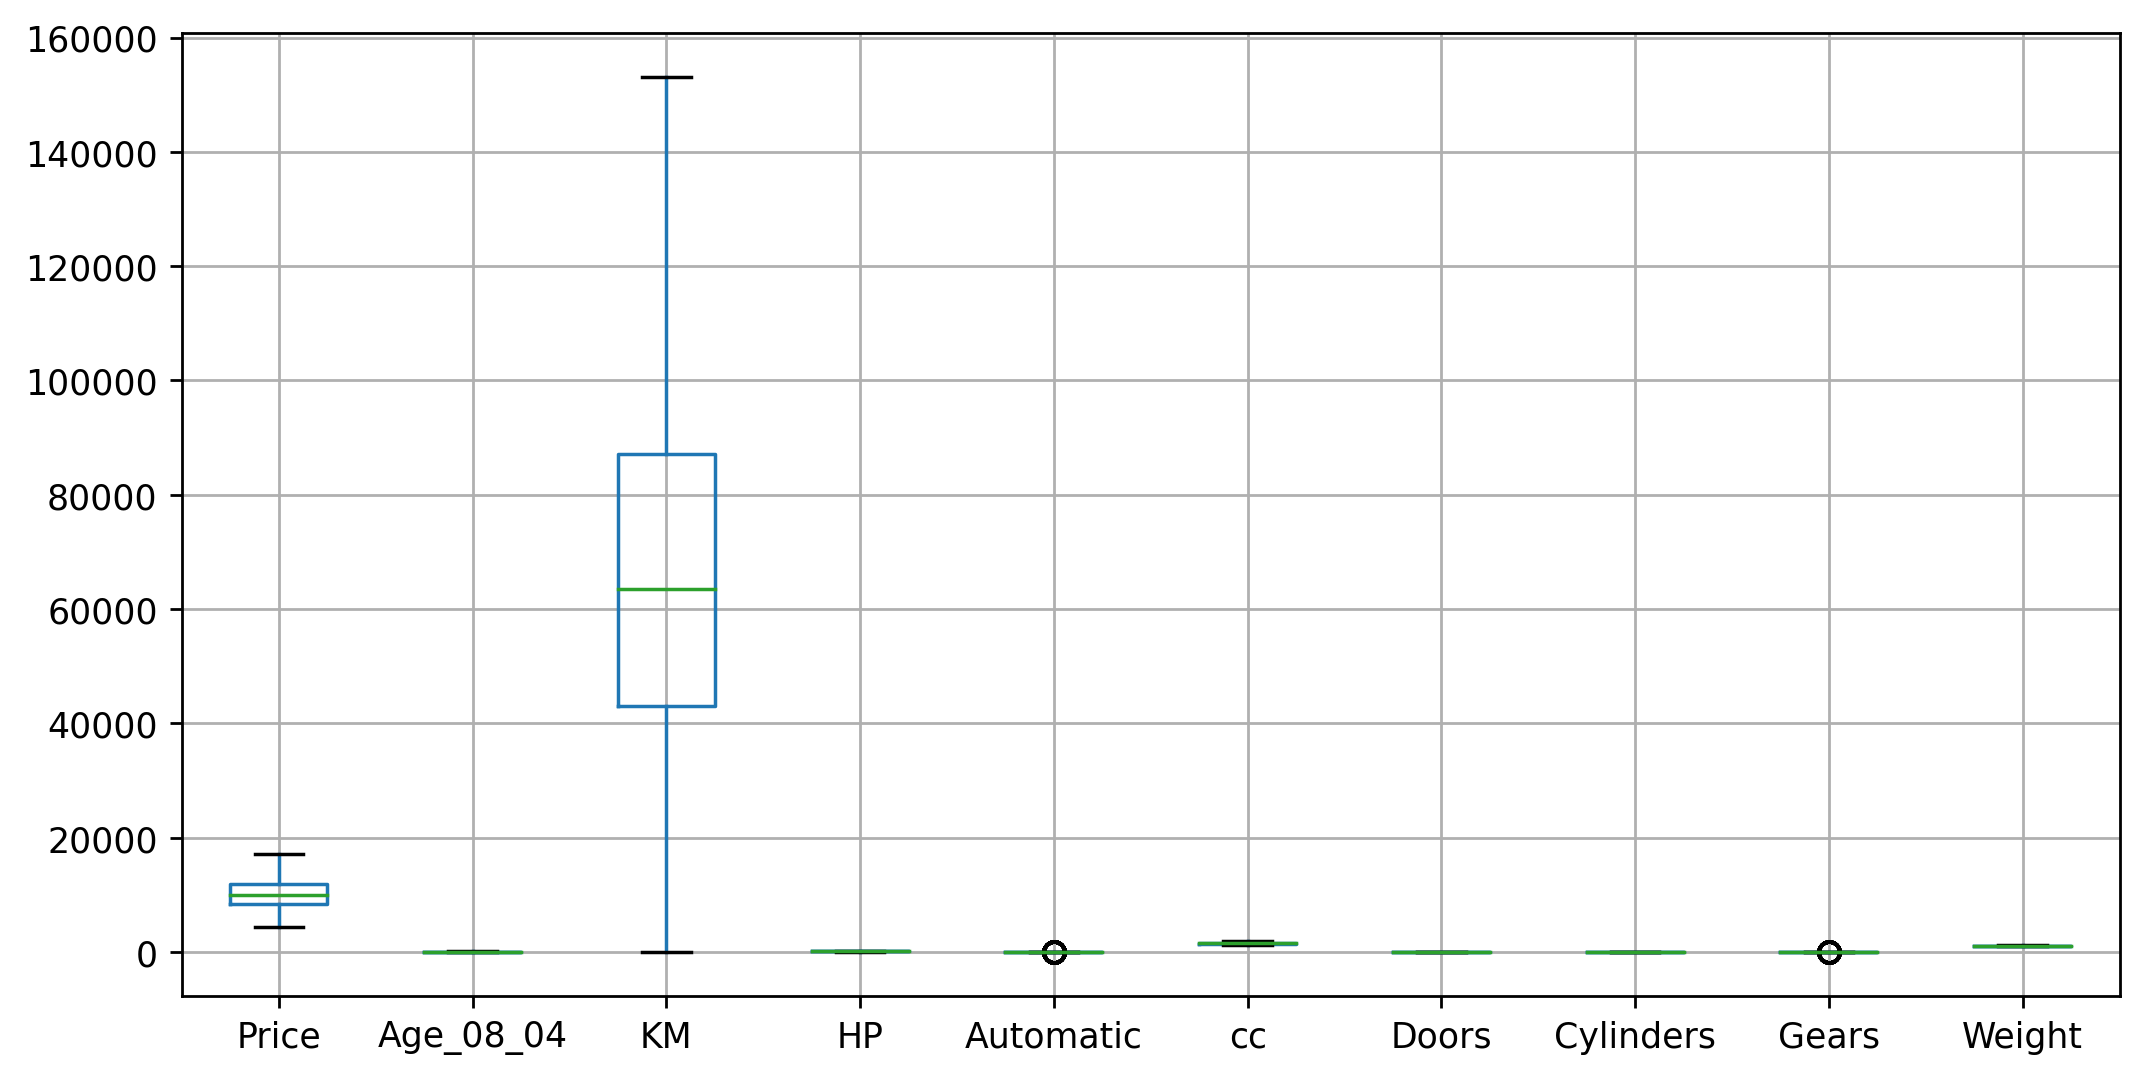

In [23]:
data.boxplot()

In [24]:
data

Price  Age_08_04       KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986.0    Diesel   90          0  1900      3   
1     13750         23  72937.0    Diesel   90          0  1900      3   
2     13950         24  41711.0    Diesel   90          0  1900      3   
3     14950         26  48000.0    Diesel   90          0  1900      3   
4     13750         30  38500.0    Diesel   90          0  1900      3   
...     ...        ...      ...       ...  ...        ...   ...    ...   
1431   7500         69  20544.0    Petrol   86          0  1300      3   
1432  10845         72  19000.0    Petrol   86          0  1300      3   
1433   8500         71  17016.0    Petrol   86          0  1300      3   
1434   7250         70  16916.0    Petrol   86          0  1300      3   
1435   6950         76      1.0    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5  1152.5  
1             4      5  1152.5  
2             4      5  1152.5  
3             4      5  1152.5  
4             4      5  1152.5  
...         ...    ...     ...  
1431          4      5  1025.0  
1432          4      5  1015.0  
1433          4      5  1015.0  
1434          4      5  1015.0  
1435          4      5  1114.0  

[1435 rows x 11 columns]

In [25]:
#converting text data into numeric column 
data = pd.get_dummies(data = data,columns = ['Fuel_Type'])

In [26]:
data

Price  Age_08_04       KM   HP  Automatic    cc  Doors  Cylinders  \
0     13500         23  46986.0   90          0  1900      3          4   
1     13750         23  72937.0   90          0  1900      3          4   
2     13950         24  41711.0   90          0  1900      3          4   
3     14950         26  48000.0   90          0  1900      3          4   
4     13750         30  38500.0   90          0  1900      3          4   
...     ...        ...      ...  ...        ...   ...    ...        ...   
1431   7500         69  20544.0   86          0  1300      3          4   
1432  10845         72  19000.0   86          0  1300      3          4   
1433   8500         71  17016.0   86          0  1300      3          4   
1434   7250         70  16916.0   86          0  1300      3          4   
1435   6950         76      1.0  110          0  1600      5          4   

      Gears  Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0         5  1152.5              0                 1                 0  
1         5  1152.5              0                 1                 0  
2         5  1152.5              0                 1                 0  
3         5  1152.5              0                 1                 0  
4         5  1152.5              0                 1                 0  
...     ...     ...            ...               ...               ...  
1431      5  1025.0              0                 0                 1  
1432      5  1015.0              0                 0                 1  
1433      5  1015.0              0                 0                 1  
1434      5  1015.0              0                 0                 1  
1435      5  1114.0              0                 0                 1  

[1435 rows x 13 columns]

In [27]:
#splitting the data 
X = data.drop('Price',axis = 1)
Y = data['Price']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [29]:
#now we are going to build 3 different models to interpret the coefficients of models 
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred1 = model1.predict(x_test)

In [31]:
r2_model1 = r2_score(y_test,y_pred1)
mse1 = mean_squared_error(y_test,y_pred1)
print('Coefficients : ',model1.coef_)
print('R2 score for Model1 :',r2_model1)
print('Mean Squared Error for Model1 : ',mse1)

Coefficients :  [-1.05573729e+02 -1.48955598e-02  2.98420933e+01  1.77626037e+02
 -2.70910672e+00 -1.03081882e+02  2.27373675e-13  4.22684738e+02
  2.46765938e+01 -6.60631234e+02  3.36506573e+02  3.24124661e+02]
R2 score for Model1 : 0.8522652917835877
Mean Squared Error for Model1 :  1259919.5483999222


In [32]:
#model 2
model2 = LinearRegression()
model2.fit(x_train[['Age_08_04', 'KM']], y_train)

LinearRegression()

In [33]:
y_pred2 = model2.predict(x_test[['Age_08_04', 'KM']])

In [38]:
r2_model2 = r2_score(y_test,y_pred2)
mse2 = mean_squared_error(y_test,y_pred2)
print('Coefficients : ',model2.coef_)
print('R2 score for Model2 :',r2_model2)
print('Mean Squared Error for Model2 : ',mse2)

Coefficients :  [-1.26635751e+02 -1.66202890e-02]
R2 score for Model2 : 0.8251733509798573
Mean Squared Error for Model2 :  1490966.580169273


In [35]:
#model 3
model3 = LinearRegression()
model3.fit(x_train[['KM', 'Weight']], y_train)

LinearRegression()

In [36]:
y_pred3 = model3.predict(x_test[['KM', 'Weight']])

In [39]:
r2_model3 = r2_score(y_test,y_pred3)
mse3 = mean_squared_error(y_test,y_pred3)
print('Coefficients : ',model3.coef_)
print('R2 score for Model3 :',r2_model3)
print('Mean Squared Error for Model3 : ',mse3)

Coefficients :  [-0.0529017  39.59179877]
R2 score for Model3 : 0.5887509768433135
Mean Squared Error for Model3 :  3507237.3296089107


In [41]:
#now applying Lasso and Ridge methods on the model 
model1.score(x_train,y_train), model1.score(x_test,y_test)

(0.8696384868665828, 0.8522652917835877)

#### Lasso (L1) Regression

In [44]:
l1 = Lasso()
l1.fit(x_train,y_train)
l1.score(x_train,y_train), l1.score(x_test,y_test)
# as we can see we got same accuracy and overfitted model

(0.8696213272437019, 0.8520403227827806)

In [70]:
l1.coef_

array([-1.04732527e+02, -1.65831006e-02,  2.61917234e+01,  0.00000000e+00,
       -2.27393998e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.24046562e+01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [76]:
for i in range(50, 101): 
    l1 = Lasso(alpha=i)
    l1.fit(x_train, y_train)
    train_score = l1.score(x_train, y_train)
    test_score = l1.score(x_test, y_test)
    
    print(f"Alpha: {i} | Train score: {train_score:.4f} | Test score: {test_score:.4f}")

Alpha: 50 | Train score: 0.8674 | Test score: 0.8473
Alpha: 51 | Train score: 0.8674 | Test score: 0.8473
Alpha: 52 | Train score: 0.8673 | Test score: 0.8474
Alpha: 53 | Train score: 0.8673 | Test score: 0.8474
Alpha: 54 | Train score: 0.8673 | Test score: 0.8474
Alpha: 55 | Train score: 0.8673 | Test score: 0.8474
Alpha: 56 | Train score: 0.8673 | Test score: 0.8474
Alpha: 57 | Train score: 0.8672 | Test score: 0.8474
Alpha: 58 | Train score: 0.8672 | Test score: 0.8474
Alpha: 59 | Train score: 0.8672 | Test score: 0.8475
Alpha: 60 | Train score: 0.8672 | Test score: 0.8475
Alpha: 61 | Train score: 0.8672 | Test score: 0.8475
Alpha: 62 | Train score: 0.8671 | Test score: 0.8475
Alpha: 63 | Train score: 0.8671 | Test score: 0.8475
Alpha: 64 | Train score: 0.8671 | Test score: 0.8475
Alpha: 65 | Train score: 0.8671 | Test score: 0.8475
Alpha: 66 | Train score: 0.8671 | Test score: 0.8475
Alpha: 67 | Train score: 0.8670 | Test score: 0.8476
Alpha: 68 | Train score: 0.8670 | Test score: 

In [77]:
final_lasso = Lasso(alpha=50)
final_lasso.fit(x_train, y_train)
train_score = final_lasso.score(x_train, y_train)
test_score = final_lasso.score(x_test, y_test)
print(f"Final Model | Train score: {train_score} | Test score: {test_score}")

Final Model | Train score: 0.8673674426983324 | Test score: 0.8473162328777126


In [78]:
print("Selected coefficients: ", final_lasso.coef_)

Selected coefficients:  [-1.05037682e+02 -1.60673402e-02  2.80189449e+01  0.00000000e+00
 -2.45781455e+00 -4.66152288e+01  0.00000000e+00  0.00000000e+00
  2.34488890e+01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]


#### Ridge (L2) Regression

In [80]:
l2 = Ridge()
l2.fit(x_train,y_train)
l2.score(x_train,y_train),l2.score(x_test,y_test)

(0.8696336179547335, 0.8521240592894257)

In [81]:
for i in range(50, 101): 
    l2 = Ridge(alpha=i)
    l2.fit(x_train, y_train)
    train_score = l2.score(x_train, y_train)
    test_score = l2.score(x_test, y_test)
    
    print(f"Alpha: {i} | Train score: {train_score:.4f} | Test score: {test_score:.4f}")

Alpha: 50 | Train score: 0.8688 | Test score: 0.8489
Alpha: 51 | Train score: 0.8688 | Test score: 0.8489
Alpha: 52 | Train score: 0.8688 | Test score: 0.8489
Alpha: 53 | Train score: 0.8688 | Test score: 0.8489
Alpha: 54 | Train score: 0.8688 | Test score: 0.8488
Alpha: 55 | Train score: 0.8688 | Test score: 0.8488
Alpha: 56 | Train score: 0.8688 | Test score: 0.8488
Alpha: 57 | Train score: 0.8688 | Test score: 0.8488
Alpha: 58 | Train score: 0.8688 | Test score: 0.8487
Alpha: 59 | Train score: 0.8688 | Test score: 0.8487
Alpha: 60 | Train score: 0.8687 | Test score: 0.8487
Alpha: 61 | Train score: 0.8687 | Test score: 0.8487
Alpha: 62 | Train score: 0.8687 | Test score: 0.8486
Alpha: 63 | Train score: 0.8687 | Test score: 0.8486
Alpha: 64 | Train score: 0.8687 | Test score: 0.8486
Alpha: 65 | Train score: 0.8687 | Test score: 0.8486
Alpha: 66 | Train score: 0.8687 | Test score: 0.8486
Alpha: 67 | Train score: 0.8687 | Test score: 0.8485
Alpha: 68 | Train score: 0.8687 | Test score: 

In [82]:
final_ridge = Ridge(alpha=50)  
final_ridge.fit(x_train, y_train)
train_score = final_ridge.score(x_train, y_train)
test_score = final_ridge.score(x_test, y_test)

print(f"Final Model | Train score: {train_score} | Test score: {test_score}")


Final Model | Train score: 0.8688421661822187 | Test score: 0.8489467612538459


In [83]:
print("Coefficients: ", final_ridge.coef_)

Coefficients:  [-1.05202987e+02 -1.55415998e-02  2.71837375e+01  8.52290328e+01
 -2.46225745e+00 -1.06117311e+02  0.00000000e+00  1.69192372e+02
  2.46213183e+01 -1.63365021e+02  1.79761681e+01  1.45388853e+02]


#### Interview Questions

In [ ]:
'''
1. What is Normalization & Standardization and how is it helpful?
-> Normalization rescales data to a range (typically 0 to 1) to ensure that all features contribute equally to the model. 
   Standardization transforms data to have a mean of 0 and a standard deviation of 1, making it useful when features have 
   different units or scales. Both techniques help improve model performance and convergence speed, particularly for algorithms 
   sensitive to feature scales

2. What techniques can be used to address multicollinearity in multiple linear regression?
-> Common techniques include removing highly correlated predictors, using principal component analysis (PCA) to reduce 
   dimensionality, and applying regularization methods like Lasso or Ridge regression to penalize the impact of correlated 
   features. Additionally, variance inflation factor (VIF) can be calculated to identify and address multicollinearity.
'''